In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

### 导入数据

In [2]:
path = r'C:/Users/jing/OneDrive/Desktop/2018.10.18摇床取样数据（品位+重量汇总）.xlsx'

data = pd.read_excel(path, sheet_name='73-数据源')
data = data[['R','G','B','H','S','V','L','A','B.1','gray','锡精矿品位','重量']]

In [3]:
data.corr()

,R,G,B,H,S,V,L,A,B.1,gray,锡精矿品位,重量
R,1.000000,0.977988,0.923792,-0.792289,0.629054,0.997952,0.988661,0.923022,0.879855,0.990336,0.854771,-0.734303
G,0.977988,1.000000,0.975210,-0.693817,0.553582,0.982341,0.997359,0.829282,0.791241,0.996775,0.747886,-0.659088
B,0.923792,0.975210,1.000000,-0.533374,0.490006,0.933725,0.965501,0.747893,0.646207,0.963239,0.652432,-0.620657
H,-0.792289,-0.693817,-0.533374,1.000000,-0.639252,-0.778666,-0.723089,-0.829580,-0.956326,-0.728334,-0.837271,0.586891
S,0.629054,0.553582,0.490006,-0.639252,1.000000,0.622003,0.579001,0.691953,0.653691,0.585368,0.658636,-0.557007
V,0.997952,0.982341,0.933725,-0.778666,0.622003,1.000000,0.991279,0.910487,0.866174,0.993067,0.835532,-0.715427
L,0.988661,0.997359,0.965501,-0.723089,0.579001,0.991279,1.000000,0.861672,0.819724,0.999332,0.782920,-0.683665
A,0.923022,0.829282,0.747893,-0.829580,0.691953,0.910487,0.861672,1.000000,0.899032,0.867158,0.949268,-0.815159
B.1,0.879855,0.791241,0.646207,-0.956326,0.653691,0.866174,0.819724,0.899032,1.000000,0.823763,0.877587,-0.668810
gray,0.990336,0.996775,0.963239,-0.728334,0.585368,0.993067,0.999332,0.867158,0.823763,1.000000,0.788771,-0.689375


In [4]:
# rgb = data[['R', 'G', 'B']]
# hsv = data[['H', 'S', 'V']]
# lab = data[['L', 'A', 'B.1']]
# gray = data['gray']

In [5]:
# import cv2

# green = np.uint8([np.array(rgb).tolist()])
# hsv_green = cv2.cvtColor(green , cv2.COLOR_RGB2HSV)
# print(np.round(hsv_green[:,:-1,:]/255, 2))

In [6]:
# green = np.uint8([np.array(rgb).tolist()])
# hsv_green = cv2.cvtColor(green , cv2.COLOR_RGB2LAB)
# print(np.round(hsv_green[:,:-1,:], 2))

In [7]:
# green = np.uint8([np.array(rgb).tolist()])
# hsv_green = cv2.cvtColor(green , cv2.COLOR_RGB2GRAY)
# print(np.round(hsv_green, 2))

### 数据预处理

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler


def data_preprocessing(x, y):

    X = x
    # X = data[['R','G','B']]
    # X = data[['R','G','B','H','S','V','L','A','B.1','gray']]
    # X = data[['R','G','B','锡精矿品位']]
    y = y
    # y = data['锡精矿品位']
    # y = data['重量']
    y = np.array(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

    scaler1 = MinMaxScaler()

    X_scaler1 = scaler1.fit_transform(X)
    y_scaler1 = scaler1.fit_transform(y.reshape(-1, 1))

    scaler2 = StandardScaler()

    X_scaler2 = scaler2.fit_transform(X)
    y_scaler2 = scaler2.fit_transform(y.reshape(-1, 1))

    Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaler2, y_scaler2, test_size=0.2, random_state=666)
    
    return Xtrain, Xtest, ytrain, ytest, scaler2

### 训练模型

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet,RANSACRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score


def training_model(xtrain, ytrain, xtest, ytest):
    # 训练回归模型
    n_samples, n_features = xtrain.shape # 总样本数，总特征数
    n_folds = 6 # 交叉检验次数

    lr = LinearRegression() # 线性回归
    svr = SVR(C=100, 
              epsilon=0.1, 
              gamma=0.1) # 支持向量机回归
    rf = RandomForestRegressor(n_estimators=20,
                               max_depth=10,
                               min_samples_split=2,
                               min_samples_leaf=1,
                               max_features=n_features,
                               random_state=10) # 随机森林回归
    gbr = GradientBoostingRegressor(learning_rate=0.1,
                                    n_estimators=120,
                                    max_depth=3,
                                    min_samples_leaf=1,
                                    min_samples_split=2,
                                    max_features=n_features,
                                    subsample=1) # GBDT回归
    knn = KNeighborsRegressor(n_neighbors=5, 
                              weights='distance', 
                              leaf_size=50) # K最近邻回归
    dt = DecisionTreeRegressor(criterion='mse', 
                               max_depth=None, 
                               max_features=n_features, 
                               max_leaf_nodes=None, 
                               min_impurity_decrease=0.0, 
                               min_impurity_split=None, 
                               min_samples_leaf=1, 
                               min_samples_split=2, 
                               min_weight_fraction_leaf=0.0, 
                               random_state=None, 
                               splitter='best') # 决策树回归
    ransac = RANSACRegressor() # 随机采样一致性回归
    ridge = Ridge(alpha=0.1) # Ridge回归
    lasso = Lasso(alpha=0.01) # Lasso回归
    en = ElasticNet(alpha=0.01, l1_ratio=0.01) # 弹性网络回归

    mnames = ['LinearRegression', 
              'SVR', 
              'RandomForestRegressor', 
              'GradientBoostingRegressor', 
              'KNeighborsRegressor', 
              'DecisionTreeRegressor', 
              'RANSACRegressor', 
              'Ridge', 
              'Lasso', 
              'ElasticNet'] # 回归模型名称列表
    mlist = [lr, svr, rf, gbr, knn, dt, ransac, ridge, lasso, en] # 回归模型对象列表

    cv_scores = [] # 交叉检验结果列表
    y_pred = [] # 回归模型预测y值列表

    for model in mlist:
        scores = cross_val_score(model, xtrain, ytrain.ravel(), cv=n_folds) # 将每个回归模型导入交叉检验
        predicted = model.fit(xtrain, ytrain.ravel()).predict(xtest) # 回归训练得到预测y值
        cv_scores.append(scores) # 将交叉验证结果存入列表
        y_pred.append(predicted) # 将回归训练中得到的预测y值存入列表

    # 模型效果评估
    metrics_name = [explained_variance_score, mean_absolute_error, mean_squared_error, r2_score] # 回归评估指标对象集
    metrics_list = [] # 回归评估指标列表

    for i in range(len(mlist)):
        tmp = [] # 每个内循环的临时结果列表
        for m in metrics_name:
            score = m(ytest, y_pred[i]) # 计算每个回归指标结果
            tmp.append(score)
        metrics_list.append(tmp)

    df_cv = pd.DataFrame(cv_scores, index=mnames) # 交叉验证数据框
    df_metrics = pd.DataFrame(metrics_list, index=mnames, columns=['ev', 'mae', 'mse', 'r2']) # 回归指标数据框

    return df_cv, df_metrics, y_pred, mnames

D:\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [10]:
# x = data[['R','G','B']]
# y = data['锡精矿品位']

# Xtrain, Xtest, ytrain, ytest, scaler2 = data_preprocessing(x, y)
# df_cv, df_metrics, y_pred, mnames = training_model(Xtrain, ytrain, Xtest, ytest)

In [11]:
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures   # 生成多项式特征,不是直接用多项式模型拟合
# #http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures

# lr = LinearRegression()
# pr = LinearRegression()

# quadratic = PolynomialFeatures(degree=3)   # degree设置多项式拟合中多项式的最高次数
# X_quad = quadratic.fit_transform(Xtrain)   # X列向量，fit_transform是对X按列求[1, X, X^2]，即构造二次项数据
# # For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
# # fit linear features
# lr.fit(Xtrain, ytrain.ravel())
# y_lin_fit = lr.predict(Xtrain)   # 利用线性回归对构造的X_fit数据预测

# # fit quadratic features
# pr.fit(X_quad, ytrain.ravel())   # X_quad是训练数据,使用它进行建模得多项式系数
# y_quad_fit = pr.predict(X_quad)   # 利用二次多项式对构造的X_fit数据预测

# # plot results
# plt.scatter(Xtrain[:,-1], ytrain.ravel(), label='训练样本')
# plt.plot(Xtrain[:,-1], y_lin_fit, label='线形拟合', linestyle='--')
# plt.plot(sorted(Xtrain[:,-1]), y_quad_fit, label='多项式拟合')
# plt.legend(loc='upper right')

# plt.tight_layout()
# # plt.savefig('./poly_example.png', dpi=300)

# plt.show()

In [12]:
# import matplotlib.pyplot as plt
# import numpy as np

# z1 = np.polyfit(Xtrain[:,-1], ytrain, 3).ravel() # 用3次多项式拟合
# p1 = np.poly1d(z1)
# print(p1) # 在屏幕上打印拟合多项式
# yvals = p1(Xtrain[:,-1]) # 也可以使用yvals=np.polyval(z1,x)
# plt.plot(Xtrain[:,-1], ytrain, '*',label='原始样本')
# plt.plot(sorted(Xtrain[:,-1], reverse=False), yvals, 'r',label='多项式拟合')
# plt.xlabel('x axis')
# plt.ylabel('y axis')
# plt.legend(loc=1) # 指定legend的位置,读者可以自己help它的用法
# plt.title('polyfitting')
# plt.show()

In [13]:
# # 使用非线性最小二乘法拟合
# import matplotlib.pyplot as plt
# from scipy.optimize import curve_fit
# import numpy as np

# # 用指数形式来拟合
# def func(x,a,b):
#     return a*np.exp(b/x)
# popt, pcov = curve_fit(func, Xtrain[:,-1].ravel(), ytrain.ravel())
# a = popt[0] # popt里面是拟合系数，读者可以自己help其用法
# b = popt[1]
# yvals = func(Xtrain[:,-1],a,b)
# plt.plot(Xtrain[:,-1], ytrain, '*',label='原始样本')
# plt.plot(sorted(Xtrain[:,-1], reverse=False), yvals, 'r',label='指数曲线拟合')
# plt.xlabel('x axis')
# plt.ylabel('y axis')
# plt.legend(loc=1) # 指定legend的位置,读者可以自己help它的用法
# plt.title('curve_fit')
# plt.show()

### 模型评估和结果输出

In [14]:
x = data[['R','G','B']]
y = data['锡精矿品位']

Xtrain, Xtest, ytrain, ytest, scaler2 = data_preprocessing(x, y)
df_cv, df_metrics, y_pred, mnames = training_model(Xtrain, ytrain, Xtest, ytest)

In [15]:
df_cv.mean(axis=1).sort_values(ascending=False)

LinearRegression             0.827832
RANSACRegressor              0.816259
Ridge                        0.811329
SVR                          0.790741
Lasso                        0.789591
ElasticNet                   0.762288
KNeighborsRegressor          0.623676
GradientBoostingRegressor    0.618040
RandomForestRegressor        0.588430
DecisionTreeRegressor        0.577936
dtype: float64

In [16]:
df_cv.std(axis=1).sort_values(ascending=True)

LinearRegression             0.130378
Ridge                        0.180623
RANSACRegressor              0.185783
Lasso                        0.219713
ElasticNet                   0.246824
SVR                          0.254808
KNeighborsRegressor          0.561743
DecisionTreeRegressor        0.658423
GradientBoostingRegressor    0.659779
RandomForestRegressor        0.660993
dtype: float64

In [17]:
df_metrics.sort_values(by='r2', ascending=False)

,ev,mae,mse,r2
SVR,0.970233,0.138667,0.029441,0.969513
DecisionTreeRegressor,0.958630,0.147105,0.043283,0.955180
Lasso,0.954412,0.152672,0.044061,0.954374
ElasticNet,0.951446,0.167004,0.046891,0.951443
Ridge,0.950640,0.148060,0.047764,0.950540
LinearRegression,0.943199,0.166142,0.055259,0.942779
GradientBoostingRegressor,0.940577,0.211773,0.077371,0.919881
KNeighborsRegressor,0.943765,0.226163,0.081414,0.915695
RANSACRegressor,0.922758,0.254967,0.092160,0.904566
RandomForestRegressor,0.932754,0.258178,0.126645,0.868857


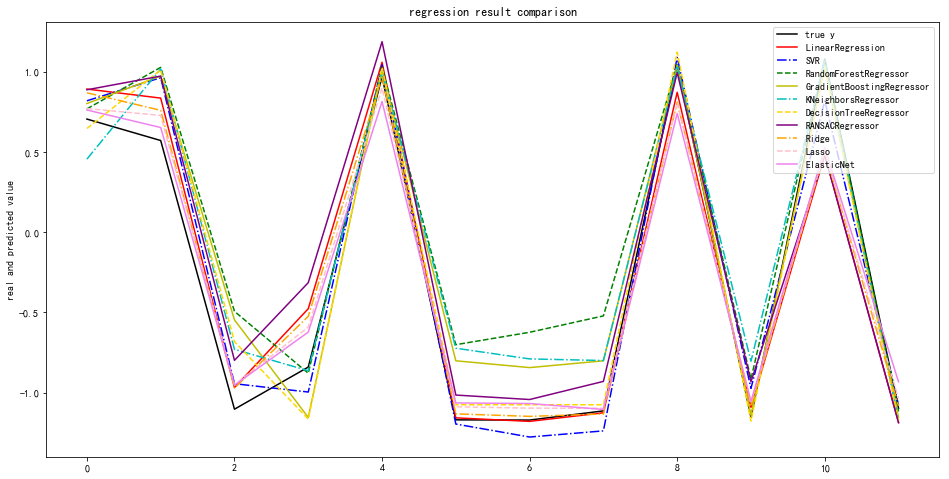

In [18]:
# 模型效果可视化
plt.figure(figsize=(16, 8))  # 创建画布
plt.plot(np.arange(Xtest.shape[0]), ytest, color='k', label='true y')  # 画出原始值的曲线
color_list = ['r', 'b', 'g', 'y', 'c', 'gold', 'purple', 'orange', 'pink', 'Violet']  # 颜色列表
linestyle_list = ['-', '-.', '--', '-', '-.', '--', '-', '-.', '--', '-']  # 样式列表
for i, pre_y in enumerate(y_pred):  # 读出通过回归模型预测得到的索引及结果
    plt.plot(np.arange(Xtest.shape[0]), y_pred[i], color=color_list[i], linestyle=linestyle_list[i], label=mnames[i])  # 画出每条预测结果线
plt.title('regression result comparison')  # 标题
plt.legend(loc='upper right')  # 图例位置
plt.ylabel('real and predicted value')  # y轴标题
plt.show()  # 展示图像

In [19]:
pred = pd.DataFrame(scaler2.inverse_transform(y_pred)).T
pred.columns = ['线性回归', '支持向量机', '随机森林', 'GBDT', 'KNN', '决策树', 'RANSAC', 'Ridge', 'Lasso', '弹性网络']
pred['实际值'] = pd.DataFrame(scaler2.inverse_transform(ytest))
pred

,线性回归,支持向量机,随机森林,GBDT,KNN,决策树,RANSAC,Ridge,Lasso,弹性网络,实际值
0,68.559363,66.219054,64.6095,65.671338,54.580030,60.690,68.411442,67.816147,64.668953,64.380845,62.570
1,66.753195,70.825131,72.8855,71.149061,72.577254,72.380,71.145855,64.313505,63.296003,60.888772,58.290
2,9.023605,9.774544,24.2038,22.503174,16.625555,18.160,14.432941,8.890329,9.553195,9.489909,4.690
3,24.735043,8.111415,11.8642,3.052645,12.364316,2.714,29.934775,23.218766,21.066978,20.070397,13.090
4,73.908346,73.394895,72.9170,72.327485,72.015533,72.870,78.008114,70.976826,68.784937,66.070508,71.040
5,2.960149,1.724845,17.5588,14.342807,16.852971,5.580,7.507594,3.759303,5.168680,5.934426,2.559
6,2.259581,-0.864923,20.0345,12.988770,14.720022,5.580,6.618936,3.258406,4.900723,5.825917,2.524
7,3.970158,0.362986,23.3008,14.342807,14.398468,5.580,10.236655,3.729698,4.868132,4.633700,4.350
8,67.912673,74.868935,73.3465,73.258073,72.947657,75.940,71.850598,65.938251,65.804817,63.684692,73.350
9,5.061854,8.842494,10.7087,3.462583,14.252326,2.316,10.173567,5.261994,5.972552,6.259953,3.030


In [20]:
x = data[['H','S','V']]
y = data['锡精矿品位']

Xtrain, Xtest, ytrain, ytest, scaler2 = data_preprocessing(x, y)
df_cv, df_metrics, y_pred, mnames = training_model(Xtrain, ytrain, Xtest, ytest)

In [21]:
df_cv.mean(axis=1).sort_values(ascending=False)

KNeighborsRegressor          0.763073
DecisionTreeRegressor        0.719809
RandomForestRegressor        0.717086
GradientBoostingRegressor    0.696020
SVR                          0.632087
Lasso                       -0.465309
ElasticNet                  -0.472338
RANSACRegressor             -0.619889
Ridge                       -0.754131
LinearRegression            -0.877288
dtype: float64

In [22]:
df_cv.std(axis=1).sort_values(ascending=True)

DecisionTreeRegressor        0.203577
RandomForestRegressor        0.246220
SVR                          0.275415
GradientBoostingRegressor    0.323210
KNeighborsRegressor          0.343973
Lasso                        2.450147
ElasticNet                   2.472371
Ridge                        3.149496
RANSACRegressor              3.334017
LinearRegression             3.446874
dtype: float64

In [23]:
df_metrics.sort_values(by='r2', ascending=False)

,ev,mae,mse,r2
KNeighborsRegressor,0.952130,0.197903,0.062507,0.935273
SVR,0.958027,0.217020,0.071919,0.925526
RANSACRegressor,0.914923,0.245872,0.083763,0.913262
RandomForestRegressor,0.924192,0.227870,0.101923,0.894457
GradientBoostingRegressor,0.870313,0.283478,0.142392,0.852551
LinearRegression,0.855368,0.333627,0.146719,0.848070
Ridge,0.854990,0.334121,0.147114,0.847661
ElasticNet,0.853524,0.336027,0.148650,0.846070
Lasso,0.850327,0.340013,0.152196,0.842398
DecisionTreeRegressor,0.838726,0.242916,0.162125,0.832117


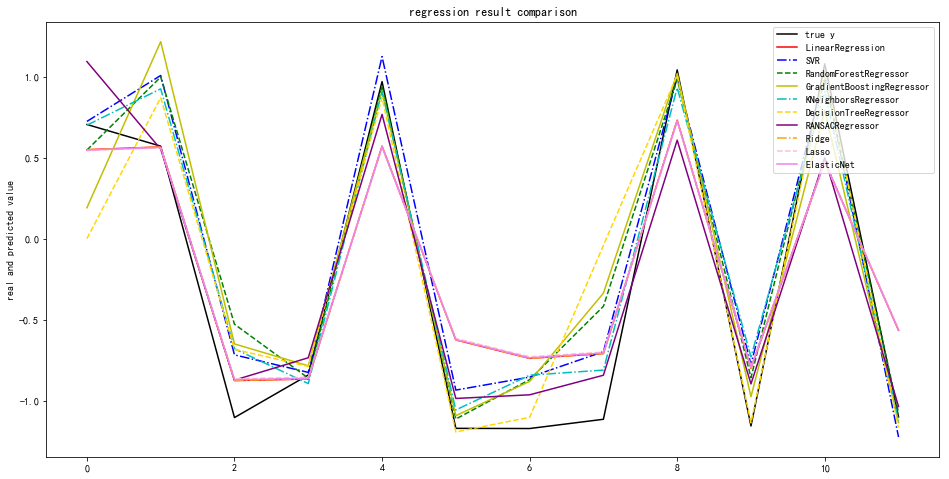

In [24]:
# 模型效果可视化
plt.figure(figsize=(16, 8))  # 创建画布
plt.plot(np.arange(Xtest.shape[0]), ytest, color='k', label='true y')  # 画出原始值的曲线
color_list = ['r', 'b', 'g', 'y', 'c', 'gold', 'purple', 'orange', 'pink', 'Violet']  # 颜色列表
linestyle_list = ['-', '-.', '--', '-', '-.', '--', '-', '-.', '--', '-']  # 样式列表
for i, pre_y in enumerate(y_pred):  # 读出通过回归模型预测得到的索引及结果
    plt.plot(np.arange(Xtest.shape[0]), y_pred[i], color=color_list[i], linestyle=linestyle_list[i], label=mnames[i])  # 画出每条预测结果线
plt.title('regression result comparison')  # 标题
plt.legend(loc='upper right')  # 图例位置
plt.ylabel('real and predicted value')  # y轴标题
plt.show()  # 展示图像

In [25]:
pred = pd.DataFrame(scaler2.inverse_transform(y_pred)).T
pred.columns = ['线性回归', '支持向量机', '随机森林', 'GBDT', 'KNN', '决策树', 'RANSAC', 'Ridge', 'Lasso', '弹性网络']
pred['实际值'] = pd.DataFrame(scaler2.inverse_transform(ytest))
pred

,线性回归,支持向量机,随机森林,GBDT,KNN,决策树,RANSAC,Ridge,Lasso,弹性网络,实际值
0,57.590806,63.173591,57.51950,46.124270,62.435138,40.030,74.995348,57.578481,57.424956,57.531508,62.570
1,58.138615,72.248370,71.94000,78.919772,69.608447,67.860,57.700598,58.118933,57.960655,58.043830,58.290
2,11.992004,17.072148,23.12500,19.230640,18.270045,18.160,12.085039,12.024161,12.335743,12.147232,4.690
3,12.296300,13.607382,12.48900,14.915567,11.398632,14.790,16.499803,12.328243,12.657982,12.451194,13.090
4,58.284367,75.976098,70.16450,69.242060,69.089705,67.860,64.565030,58.267945,58.094597,58.204874,71.040
5,20.021639,10.114809,4.40405,5.068605,6.197039,1.846,8.462712,20.036675,20.323126,20.096108,2.559
6,16.379419,12.677482,12.18000,11.827084,13.056732,4.740,9.182305,16.402240,16.694595,16.490434,2.524
7,17.323214,17.696960,26.65550,29.253673,14.066854,38.700,13.047040,17.346587,17.621625,17.436645,4.350
8,63.416977,71.854285,71.54900,72.648813,69.827846,72.290,59.479155,63.389669,63.183772,63.285603,73.350
9,14.437766,15.181957,12.55700,8.810546,16.674292,3.640,11.333125,14.464347,14.775685,14.566895,3.030


In [26]:
x = data[['L','A','B.1']]
y = data['锡精矿品位']

Xtrain, Xtest, ytrain, ytest, scaler2 = data_preprocessing(x, y)
df_cv, df_metrics, y_pred, mnames = training_model(Xtrain, ytrain, Xtest, ytest)

In [27]:
df_cv.mean(axis=1).sort_values(ascending=False)

RANSACRegressor              0.842706
Ridge                        0.826700
LinearRegression             0.826687
ElasticNet                   0.825994
Lasso                        0.821837
KNeighborsRegressor          0.790675
SVR                          0.782334
GradientBoostingRegressor    0.772641
RandomForestRegressor        0.770150
DecisionTreeRegressor        0.678081
dtype: float64

In [28]:
df_cv.std(axis=1).sort_values(ascending=True)

LinearRegression             0.158040
Ridge                        0.159766
RANSACRegressor              0.162390
ElasticNet                   0.165314
Lasso                        0.170369
SVR                          0.237134
KNeighborsRegressor          0.291544
GradientBoostingRegressor    0.324938
RandomForestRegressor        0.344770
DecisionTreeRegressor        0.494317
dtype: float64

In [29]:
df_metrics.sort_values(by='r2', ascending=False)

,ev,mae,mse,r2
SVR,0.959480,0.134231,0.039326,0.959278
KNeighborsRegressor,0.972627,0.159482,0.041954,0.956556
DecisionTreeRegressor,0.963334,0.132142,0.042075,0.956430
GradientBoostingRegressor,0.969699,0.153258,0.043001,0.955472
Lasso,0.933400,0.213751,0.071995,0.925448
RandomForestRegressor,0.960545,0.234353,0.073456,0.923935
ElasticNet,0.929407,0.215285,0.076148,0.921148
Ridge,0.924779,0.225824,0.080937,0.916189
LinearRegression,0.923363,0.228810,0.082391,0.914683
RANSACRegressor,0.905337,0.247344,0.095822,0.900775


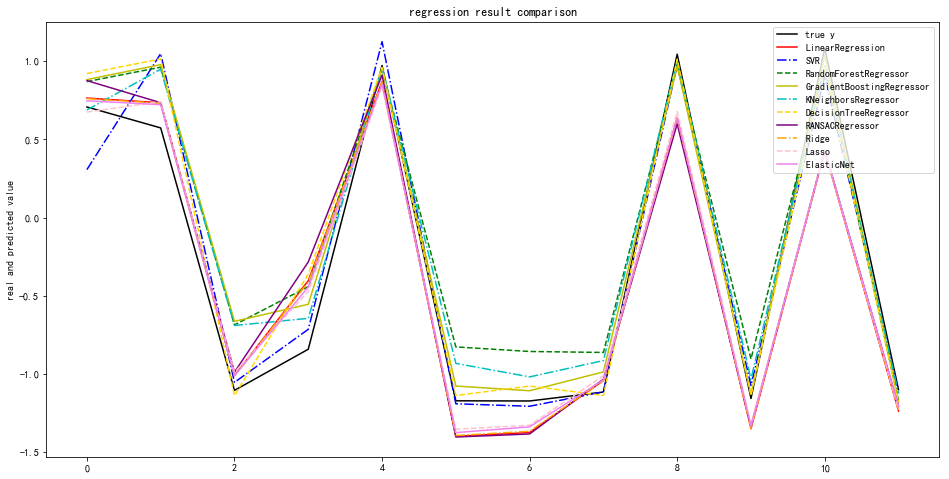

In [30]:
# 模型效果可视化
plt.figure(figsize=(16, 8))  # 创建画布
plt.plot(np.arange(Xtest.shape[0]), ytest, color='k', label='true y')  # 画出原始值的曲线
color_list = ['r', 'b', 'g', 'y', 'c', 'gold', 'purple', 'orange', 'pink', 'Violet']  # 颜色列表
linestyle_list = ['-', '-.', '--', '-', '-.', '--', '-', '-.', '--', '-']  # 样式列表
for i, pre_y in enumerate(y_pred):  # 读出通过回归模型预测得到的索引及结果
    plt.plot(np.arange(Xtest.shape[0]), y_pred[i], color=color_list[i], linestyle=linestyle_list[i], label=mnames[i])  # 画出每条预测结果线
plt.title('regression result comparison')  # 标题
plt.legend(loc='upper right')  # 图例位置
plt.ylabel('real and predicted value')  # y轴标题
plt.show()  # 展示图像

In [31]:
pred = pd.DataFrame(scaler2.inverse_transform(y_pred)).T
pred.columns = ['线性回归', '支持向量机', '随机森林', 'GBDT', 'KNN', '决策树', 'RANSAC', 'Ridge', 'Lasso', '弹性网络']
pred['实际值'] = pd.DataFrame(scaler2.inverse_transform(ytest))
pred

,线性回归,支持向量机,随机森林,GBDT,KNN,决策树,RANSAC,Ridge,Lasso,弹性网络,实际值
0,64.387366,49.774838,67.753000,68.157752,61.960820,69.400,67.950228,64.273281,61.529123,63.827219,62.570
1,63.427260,73.461061,70.693000,71.213787,70.281572,72.380,63.439932,63.336393,63.667921,63.028903,58.290
2,7.721669,6.325848,18.057667,18.787939,17.946885,3.640,8.416524,7.712011,8.366853,7.700059,4.690
3,27.086067,17.157061,25.879667,22.270315,19.397975,28.430,30.914266,26.794829,24.892405,25.771866,13.090
4,67.803638,75.900688,70.219000,70.611503,70.610000,70.610,69.090469,67.688562,66.869448,67.275516,71.040
5,-4.696577,1.949715,13.565267,5.576505,10.205747,3.640,-4.839100,-4.531782,-3.249252,-3.935749,2.559
6,-3.917884,1.446730,12.632100,4.615052,7.438393,5.580,-4.216777,-3.661212,-2.438810,-2.754277,2.524
7,6.693759,4.378491,12.434500,8.467007,10.778612,3.640,6.979892,6.717268,7.683686,6.824304,4.350
8,60.343530,71.125913,71.222000,70.920633,72.039213,72.290,59.130034,60.352164,61.618419,60.401639,73.350
9,-3.154712,5.694999,11.102600,3.892746,6.968249,3.640,-2.684151,-3.039667,-2.224502,-2.622116,3.030


In [32]:
x = data[['gray']]
y = data['锡精矿品位']

Xtrain, Xtest, ytrain, ytest, scaler2 = data_preprocessing(x, y)
df_cv, df_metrics, y_pred, mnames = training_model(Xtrain, ytrain, Xtest, ytest)

In [33]:
df_cv.mean(axis=1).sort_values(ascending=False)

SVR                          0.382349
Lasso                        0.373849
ElasticNet                   0.373665
Ridge                        0.371989
LinearRegression             0.371402
RandomForestRegressor        0.177060
KNeighborsRegressor          0.125669
GradientBoostingRegressor    0.117479
DecisionTreeRegressor        0.107218
RANSACRegressor             -0.382139
dtype: float64

In [34]:
df_cv.std(axis=1).sort_values(ascending=True)

Lasso                        0.510482
ElasticNet                   0.512111
Ridge                        0.517150
LinearRegression             0.518856
SVR                          0.769416
GradientBoostingRegressor    0.808221
DecisionTreeRegressor        0.811098
KNeighborsRegressor          0.816287
RandomForestRegressor        0.836779
RANSACRegressor              1.160874
dtype: float64

In [35]:
df_metrics.sort_values(by='r2', ascending=False)

,ev,mae,mse,r2
SVR,0.830101,0.290918,0.165310,0.828819
LinearRegression,0.708714,0.472459,0.281793,0.708199
Ridge,0.708143,0.473076,0.282373,0.707598
ElasticNet,0.705954,0.475408,0.284604,0.705288
Lasso,0.704998,0.476410,0.285582,0.704275
RandomForestRegressor,0.700759,0.379729,0.310220,0.678762
RANSACRegressor,0.747709,0.392782,0.339649,0.648287
GradientBoostingRegressor,0.601064,0.402171,0.394416,0.591576
DecisionTreeRegressor,0.593381,0.407821,0.401615,0.584121
KNeighborsRegressor,0.589925,0.427747,0.408407,0.577088


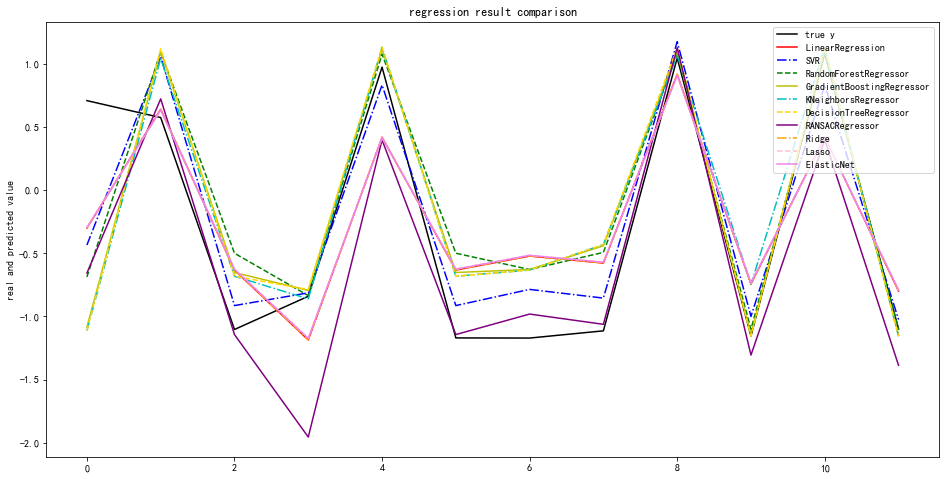

In [36]:
# 模型效果可视化
plt.figure(figsize=(16, 8))  # 创建画布
plt.plot(np.arange(Xtest.shape[0]), ytest, color='k', label='true y')  # 画出原始值的曲线
color_list = ['r', 'b', 'g', 'y', 'c', 'gold', 'purple', 'orange', 'pink', 'Violet']  # 颜色列表
linestyle_list = ['-', '-.', '--', '-', '-.', '--', '-', '-.', '--', '-']  # 样式列表
for i, pre_y in enumerate(y_pred):  # 读出通过回归模型预测得到的索引及结果
    plt.plot(np.arange(Xtest.shape[0]), y_pred[i], color=color_list[i], linestyle=linestyle_list[i], label=mnames[i])  # 画出每条预测结果线
plt.title('regression result comparison')  # 标题
plt.legend(loc='upper right')  # 图例位置
plt.ylabel('real and predicted value')  # y轴标题
plt.show()  # 展示图像

In [37]:
pred = pd.DataFrame(scaler2.inverse_transform(y_pred)).T
pred.columns = ['线性回归', '支持向量机', '随机森林', 'GBDT', 'KNN', '决策树', 'RANSAC', 'Ridge', 'Lasso', '弹性网络']
pred['实际值'] = pd.DataFrame(scaler2.inverse_transform(ytest))
pred

,线性回归,支持向量机,随机森林,GBDT,KNN,决策树,RANSAC,Ridge,Lasso,弹性网络,实际值
0,30.329554,26.051437,17.983333,5.270917,4.390000,4.390000,18.956888,30.353396,30.482258,30.443515,62.570
1,60.392513,73.698517,74.913595,75.028087,73.213043,75.670000,63.010923,60.355747,60.157035,60.216780,58.290
2,19.719098,10.738900,23.978192,19.100821,18.160000,18.160000,3.408405,19.764331,20.008808,19.935304,4.690
3,2.035004,13.959067,13.261500,14.575132,12.433886,14.790000,-22.505733,2.115890,2.553057,2.421618,13.090
4,53.318876,66.518442,74.337000,75.547352,76.080000,76.080000,52.645268,53.296370,53.174734,53.211305,71.040
5,19.719098,10.738900,23.978192,19.100821,18.160000,18.160000,3.408405,19.764331,20.008808,19.935304,2.559
6,23.255917,14.831497,19.861667,19.872305,19.720000,19.720000,8.591233,23.294020,23.499958,23.438041,2.524
7,21.487507,12.631395,24.185458,25.859789,26.183333,26.183333,5.999819,21.529176,21.754383,21.686672,4.350
8,69.234560,77.475570,74.465667,74.969279,74.046842,75.940000,75.967992,69.179968,68.884910,68.973622,73.350
9,16.182279,7.993536,4.731000,3.350698,16.119826,2.978000,-1.774422,16.234643,16.517658,16.432567,3.030


In [38]:
x = data[['A']]
y = data['锡精矿品位']

Xtrain, Xtest, ytrain, ytest, scaler2 = data_preprocessing(x, y)
df_cv, df_metrics, y_pred, mnames = training_model(Xtrain, ytrain, Xtest, ytest)

In [39]:
df_cv.mean(axis=1).sort_values(ascending=False)

KNeighborsRegressor          0.876715
SVR                          0.862941
RANSACRegressor              0.831627
ElasticNet                   0.829047
Lasso                        0.829019
Ridge                        0.828824
LinearRegression             0.828718
RandomForestRegressor        0.792350
GradientBoostingRegressor    0.775165
DecisionTreeRegressor        0.775164
dtype: float64

In [40]:
df_cv.std(axis=1).sort_values(ascending=True)

KNeighborsRegressor          0.155297
SVR                          0.165254
Lasso                        0.182614
ElasticNet                   0.182741
Ridge                        0.184480
LinearRegression             0.185074
RANSACRegressor              0.185715
RandomForestRegressor        0.354269
GradientBoostingRegressor    0.395745
DecisionTreeRegressor        0.395746
dtype: float64

In [41]:
df_metrics.sort_values(by='r2', ascending=False)

,ev,mae,mse,r2
KNeighborsRegressor,0.971694,0.107019,0.028370,0.970622
GradientBoostingRegressor,0.970932,0.108564,0.029336,0.969622
DecisionTreeRegressor,0.970932,0.108563,0.029336,0.969622
SVR,0.968115,0.095804,0.030801,0.968105
RandomForestRegressor,0.969631,0.115303,0.031655,0.967220
LinearRegression,0.939547,0.223062,0.066408,0.931234
Ridge,0.939323,0.222841,0.066462,0.931178
ElasticNet,0.938410,0.222006,0.066746,0.930884
Lasso,0.938327,0.221934,0.066776,0.930852
RANSACRegressor,0.938047,0.237094,0.076774,0.920500


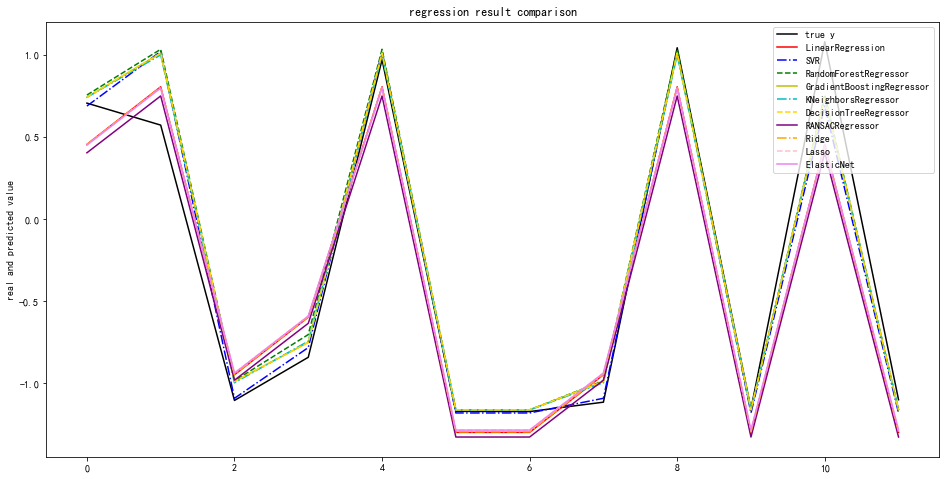

In [42]:
# 模型效果可视化
plt.figure(figsize=(16, 8))  # 创建画布
plt.plot(np.arange(Xtest.shape[0]), ytest, color='k', label='true y')  # 画出原始值的曲线
color_list = ['r', 'b', 'g', 'y', 'c', 'gold', 'purple', 'orange', 'pink', 'Violet']  # 颜色列表
linestyle_list = ['-', '-.', '--', '-', '-.', '--', '-', '-.', '--', '-']  # 样式列表
for i, pre_y in enumerate(y_pred):  # 读出通过回归模型预测得到的索引及结果
    plt.plot(np.arange(Xtest.shape[0]), y_pred[i], color=color_list[i], linestyle=linestyle_list[i], label=mnames[i])  # 画出每条预测结果线
plt.title('regression result comparison')  # 标题
plt.legend(loc='upper right')  # 图例位置
plt.ylabel('real and predicted value')  # y轴标题
plt.show()  # 展示图像

In [43]:
pred = pd.DataFrame(scaler2.inverse_transform(y_pred)).T
pred.columns = ['线性回归', '支持向量机', '随机森林', 'GBDT', 'KNN', '决策树', 'RANSAC', 'Ridge', 'Lasso', '弹性网络']
pred['实际值'] = pd.DataFrame(scaler2.inverse_transform(ytest))
pred

,线性回归,支持向量机,随机森林,GBDT,KNN,决策树,RANSAC,Ridge,Lasso,弹性网络,实际值
0,54.536584,62.000458,64.143299,63.704016,63.7040,63.704000,52.898976,54.510391,54.403279,54.411776,62.570
1,65.749377,72.629002,73.051848,72.307058,71.9520,72.307143,63.965820,65.699462,65.495344,65.511536,58.290
2,9.685412,5.104927,8.521535,8.363554,8.1254,8.363444,8.631598,9.754106,10.035022,10.012738,4.690
3,20.898205,14.981093,17.509558,15.985085,16.2240,15.985000,19.698443,20.943178,21.127086,21.112497,13.090
4,65.749377,72.629002,73.051848,72.307058,71.9520,72.307143,63.965820,65.699462,65.495344,65.511536,71.040
5,-1.527381,2.250176,2.841431,2.863527,2.8634,2.863400,-2.435246,-1.434965,-1.057043,-1.087022,2.559
6,-1.527381,2.250176,2.841431,2.863527,2.8634,2.863400,-2.435246,-1.434965,-1.057043,-1.087022,2.524
7,9.685412,5.104927,8.521535,8.363554,8.1254,8.363444,8.631598,9.754106,10.035022,10.012738,4.350
8,65.749377,72.629002,73.051848,72.307058,71.9520,72.307143,63.965820,65.699462,65.495344,65.511536,73.350
9,-1.527381,2.250176,2.841431,2.863527,2.8634,2.863400,-2.435246,-1.434965,-1.057043,-1.087022,3.030


In [44]:
x = data[['R','V','A','B']]
y = data['锡精矿品位']

Xtrain, Xtest, ytrain, ytest, scaler2 = data_preprocessing(x, y)
df_cv, df_metrics, y_pred, mnames = training_model(Xtrain, ytrain, Xtest, ytest)

In [45]:
df_cv.mean(axis=1).sort_values(ascending=False)

RANSACRegressor              0.863079
LinearRegression             0.852703
Ridge                        0.839232
ElasticNet                   0.832626
Lasso                        0.831546
KNeighborsRegressor          0.831310
SVR                          0.786859
RandomForestRegressor        0.749233
GradientBoostingRegressor    0.706784
DecisionTreeRegressor        0.629668
dtype: float64

In [46]:
df_cv.std(axis=1).sort_values(ascending=True)

RANSACRegressor              0.111803
LinearRegression             0.124277
Ridge                        0.147184
ElasticNet                   0.158717
Lasso                        0.158912
SVR                          0.179317
KNeighborsRegressor          0.222341
RandomForestRegressor        0.378853
GradientBoostingRegressor    0.464802
DecisionTreeRegressor        0.607037
dtype: float64

In [47]:
df_metrics.sort_values(by='r2', ascending=False)

,ev,mae,mse,r2
KNeighborsRegressor,0.978349,0.136907,0.037318,0.961357
DecisionTreeRegressor,0.966434,0.131761,0.041295,0.957239
SVR,0.961854,0.159920,0.043453,0.955004
RandomForestRegressor,0.967257,0.155865,0.049223,0.949029
GradientBoostingRegressor,0.962662,0.153696,0.053734,0.944358
ElasticNet,0.929842,0.216706,0.073527,0.923862
Ridge,0.928042,0.225755,0.076589,0.920690
Lasso,0.925025,0.232741,0.078644,0.918563
LinearRegression,0.915636,0.254891,0.090901,0.905871
RANSACRegressor,0.852643,0.302622,0.142315,0.852631


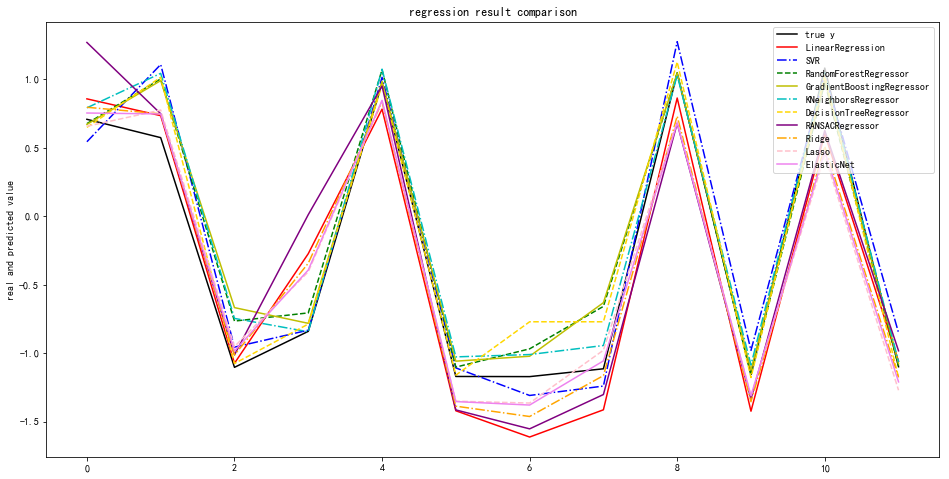

In [48]:
# 模型效果可视化
plt.figure(figsize=(16, 8))  # 创建画布
plt.plot(np.arange(Xtest.shape[0]), ytest, color='k', label='true y')  # 画出原始值的曲线
color_list = ['r', 'b', 'g', 'y', 'c', 'gold', 'purple', 'orange', 'pink', 'Violet']  # 颜色列表
linestyle_list = ['-', '-.', '--', '-', '-.', '--', '-', '-.', '--', '-']  # 样式列表
for i, pre_y in enumerate(y_pred):  # 读出通过回归模型预测得到的索引及结果
    plt.plot(np.arange(Xtest.shape[0]), y_pred[i], color=color_list[i], linestyle=linestyle_list[i], label=mnames[i])  # 画出每条预测结果线
plt.title('regression result comparison')  # 标题
plt.legend(loc='upper right')  # 图例位置
plt.ylabel('real and predicted value')  # y轴标题
plt.show()  # 展示图像

In [49]:
pred = pd.DataFrame(scaler2.inverse_transform(y_pred)).T
pred.columns = ['线性回归', '支持向量机', '随机森林', 'GBDT', 'KNN', '决策树', 'RANSAC', 'Ridge', 'Lasso', '弹性网络']
pred['实际值'] = pd.DataFrame(scaler2.inverse_transform(ytest))
pred

,线性回归,支持向量机,随机森林,GBDT,KNN,决策树,RANSAC,Ridge,Lasso,弹性网络,实际值
0,67.340223,57.328661,61.56100,61.370158,65.248193,60.690,80.501149,65.375449,60.940386,64.036937,62.570
1,63.419841,75.359268,72.00450,71.598512,73.294332,72.380,63.863765,63.850027,64.724196,63.821994,58.290
2,5.637367,9.403662,15.48250,18.624286,16.105299,5.580,7.611560,7.567272,9.533033,8.525911,4.690
3,31.209979,13.365251,17.39470,14.958813,12.987151,14.790,40.318657,28.986456,26.972227,27.402042,13.090
4,64.941039,72.363371,74.12400,71.415810,74.267475,70.610,70.348534,66.607092,66.857850,66.986222,71.040
5,-5.446410,4.553366,4.74310,6.128907,7.130534,2.870,-5.247949,-4.371302,-3.212123,-3.300846,2.559
6,-11.574457,-1.874200,9.00280,7.280459,7.673689,15.320,-9.667474,-6.783323,-3.638853,-4.111340,2.524
7,-5.223067,0.317718,18.91650,19.775838,9.782465,15.320,-1.658345,2.755088,8.679572,6.192070,4.350
8,67.538794,80.681238,73.41300,73.360179,72.860300,75.940,61.627608,63.308744,62.163812,61.717099,73.350
9,-5.544520,8.656780,2.91325,4.042900,5.254688,2.316,-2.685181,-3.329360,-1.931930,-1.936761,3.030


In [50]:
# inp = data.sort_values('锡精矿品位')[['锡精矿品位','重量']].reset_index().drop(columns='index')
# inp.plot(figsize=(16,8))

# x = inp['锡精矿品位']
# y = inp['重量']
# Xtrain = np.array(x).reshape(-1,1)
# ytrain = np.array(y)

In [51]:
# %%time

# import seaborn as sns
# sns.pairplot(data.drop(columns='重量'))

### 参数调优

In [52]:
x = data[['R','G','B','H','S','V','L','A','B.1','gray']]
# x = data[['A']]
y = data['锡精矿品位']

Xtrain, Xtest, ytrain, ytest, scaler2 = data_preprocessing(x, y)

In [53]:
# %%time

# from sklearn.model_selection import GridSearchCV

# params = {'C': range(1, 100, 1), 'epsilon': np.linspace(0, 1, 11), 'gamma': np.linspace(0, 1, 11)}
# gs = GridSearchCV(estimator=SVR(), param_grid=params, scoring='r2', cv=5)
# gs.fit(Xtrain, ytrain.ravel())
# gs.cv_results_, gs.best_params_, gs.best_score_

In [54]:
# gs.best_score_

In [55]:
# gs.best_params_

In [56]:
# from sklearn.model_selection import GridSearchCV


# gs = GridSearchCV(estimator = pipe_svc,#更换其他算法进行比较
#                   param_grid = param_grid,
#                   scoring='accuracy',
#                   cv = 10,
#                   n_jobs = -1)
# scores = cross_val_score(gs, X, Y, scroing = 'accuracy', sv = 5)
# np.mean(scores)
# np.std(scores)

In [57]:
from sklearn.model_selection import learning_curve
from sklearn.learning_curve import validation_curve


svr = SVR(C=1, gamma=0.1)
lr = LinearRegression()
ridge = Ridge(alpha=0.1)

D:\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


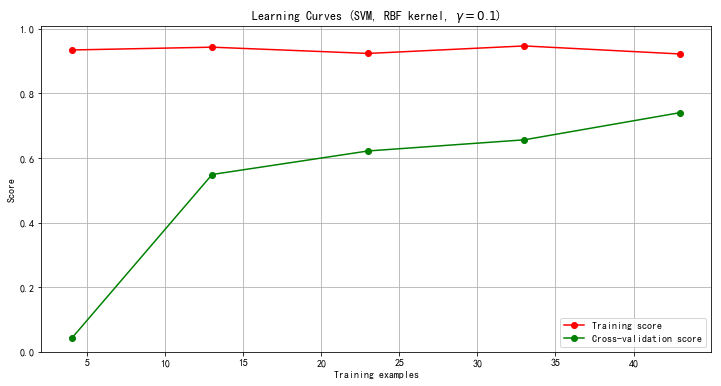

In [58]:
# 学习曲线

train_sizes, train_scores, test_scores = learning_curve(svr, Xtrain, ytrain.ravel(), cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(12,6))
plt.title('Learning Curves (SVM, RBF kernel, $\gamma=0.1$)')
plt.ylim(0, 1.01)
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

D:\anaconda3\lib\site-packages\matplotlib\mathtext.py:849: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
D:\anaconda3\lib\site-packages\matplotlib\mathtext.py:850: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


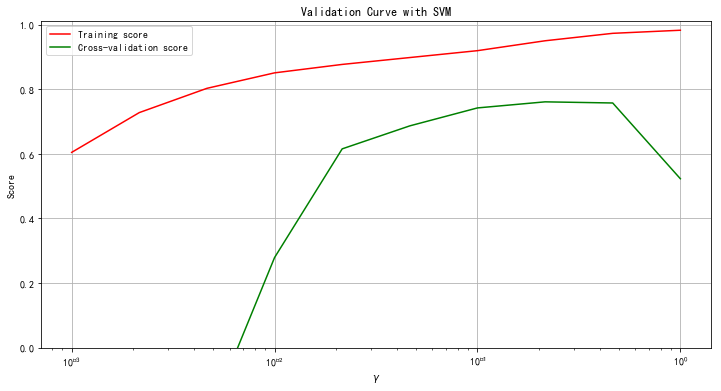

In [59]:
# 验证曲线

param_range = np.logspace(-3, 0, 10)
train_scores, test_scores = validation_curve(svr, Xtrain, ytrain.ravel(), param_name="gamma", param_range=param_range, cv=10, scoring="r2")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure(figsize=(12,6))
plt.title("Validation Curve with SVM")
plt.ylim(0.0, 1.01)
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.grid()
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.legend(loc="best")
plt.show()

### 神经网络

In [60]:
import tensorflow as tf
from tensorflow import keras


def build_model(train):
    model = keras.Sequential([
        keras.layers.Dense(64, activation=tf.nn.relu,
                           input_shape=(train.shape[1],)),
        keras.layers.Dense(64, activation=tf.nn.relu),
        keras.layers.Dense(1)])

    optimizer = tf.train.RMSPropOptimizer(0.001)

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae'])
    return model

x = data[['A']]
y = data['锡精矿品位']

Xtrain, Xtest, ytrain, ytest, scaler2 = data_preprocessing(x, y)

model = build_model(Xtrain)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 500

# Store training stats
history = model.fit(Xtrain, ytrain, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

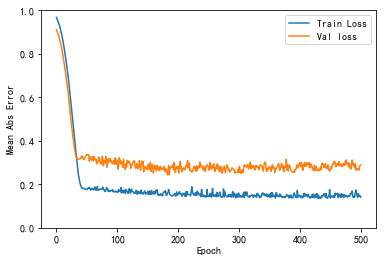

In [62]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
    plt.legend()
    plt.ylim([0, 1])

plot_history(history)


....................................................................................................
.......

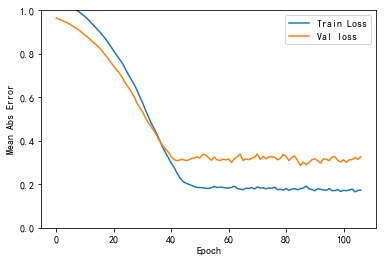

In [63]:
model = build_model(Xtrain)

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(Xtrain, ytrain, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history)

In [64]:
[loss, mae] = model.evaluate(Xtest, ytest, verbose=0)

print("Testing set Mean Abs Error: {:9.2f}".format(mae))

Testing set Mean Abs Error:      0.15


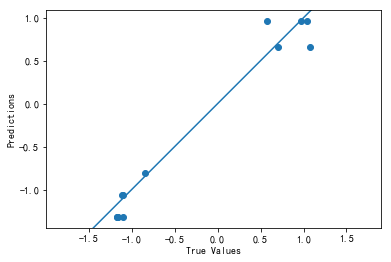

In [65]:
test_predictions = model.predict(Xtest).ravel()

plt.scatter(ytest, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

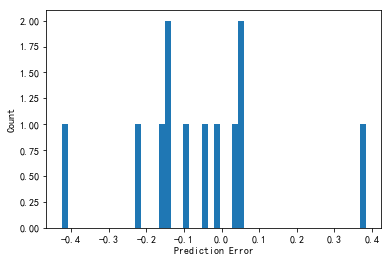

In [66]:
error = test_predictions - ytest.ravel()
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [67]:
r2_score(ytest, test_predictions)

0.9603185117385263